In [2]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plt

In [3]:
env = MountainCarEnv(render_mode="human")

In [5]:
# Por ahora no lo utilizo, pero aplico la idea en la funcion max. 

def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
        print('explore')
    # exploit
    else:
        action = np.argmax(Q[state])
        print('exploit')
    return action

In [6]:
# No lo utilizo

def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

In [7]:
pos_space = np.linspace(-1.2, 0.6, 12)
vel_space = np.linspace(-0.07, 0.07, 20)
#pos_space

In [8]:
def get_state(observation):
    pos, vel =  observation
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))

    return (pos_bin, vel_bin)

In [ ]:
state = get_state(np.array([-0.4, 0.2]))
state

In [ ]:
actions = list(range(env.action_space.n))
actions

In [9]:
Q = np.zeros((11,3,3))
Q

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
# No lo utilizo

obs = env.reset()
print(obs)
done = False
while not done:
    state = get_state(obs)
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _ = env.step(action)
    print('->', state, action, reward, obs, done)

In [10]:
def max_action(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)

    return action

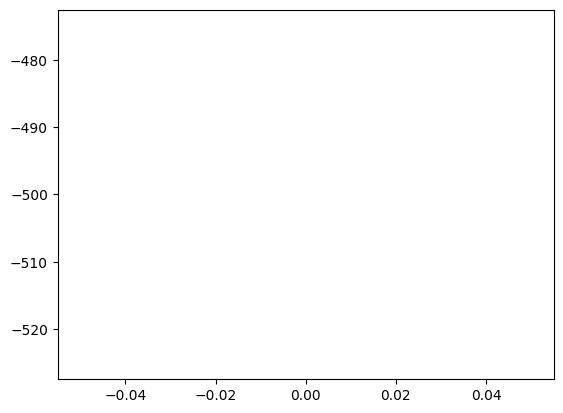

In [11]:
if __name__ == '__main__':
    n_games = 10000
    alpha = 0.1
    gamma = 0.99
    eps = 1.0

    states = []
    for pos in range(21):
        for vel in range(21):
            states.append((pos, vel))

    Q = {}
    for state in states: 
        for action in [0,1,2]:
            Q[state, action] = 0

    score = 0
    total_rewards = np.zeros(n_games)
    for i in range(n_games):
        done = False
        obs = env.reset()
        state = get_state(obs)
        if i % 1000 == 0 and i > 0:
            print ('episode',i,'score',score,'epsilon %.3f', eps)
        score =0
        while not done: 
            action = np.random.choice([0,1,2]) if np.random.random() < eps \
                else max_action(Q, state)
            obs_, reward, done, info = env.step(action)
            state_ = get_state(obs_)
            score += reward
            action_ = max_action(Q, state_)
            Q[state, action] = Q[state, action] + alpha*(reward + gamma*Q[state_, action_] - Q[state, action])
            state = state_
            total_rewards[i] = score
            eps = eps - 2/n_games if eps > 0.01 else 0.01
    mean_rewards = np.zeros(n_games)
    for r in range (n_games):
        mean_rewards[r] = np.mean(total_rewards[max(0, r-50):(r+1)])
    plt.plot(mean_rewards)
    plt.savefig('mountaincar.png')
